# load and plot data 230412-13, GHS TLS

In [34]:
###### import SOP data keysight

import csv
from collections import defaultdict
import matplotlib.pyplot as plt
import pypolar
from pandas import *

columns = defaultdict(list) # each value in each column is appended to a list


name=r"C:\Users\LABUSERS\Documents\Thorlabs\PAX1000\laser_remove_atten_0424.csv"
#name=r"C:\Users\LABUSERS\Documents\Thorlabs\PAX1000\40m_SMF_stretcher_1030pm1030am_0412.csv"

print(name)

from pandas import *
 
# reading CSV file
data = read_csv(name,encoding= 'unicode_escape')

#phi = data[' Azimuth[°] '].tolist()
#khi = data[' Ellipticity[°] '].tolist()
S1= data[' Normalized s 1 '].tolist()
S2= data[' Normalized s 2 '].tolist()
S3= data[' Normalized s 3 '].tolist()
S0= data[' S 0 [mW]'].tolist()

# normalized

C:\Users\LABUSERS\Documents\Thorlabs\PAX1000\laser_remove_atten_0424.csv


In [35]:
import numpy as np
for i in range (0,len(S0)):
 S0[i]=S0[i]/S0[i]
#print(S0)

In [36]:
 (0,len(S0))

(0, 999)

# poincare sphere

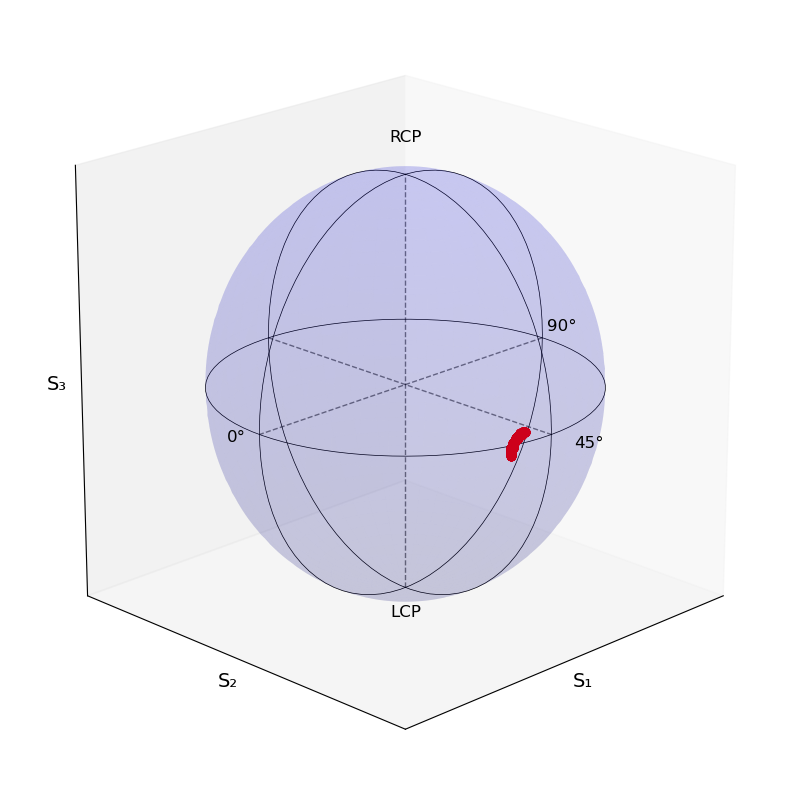

In [43]:

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')


pypolar.visualization.draw_empty_sphere(ax)
for i in range  (0,len(S0)):
 pypolar.visualization.draw_stokes_poincare([1*S0[i], 1*S1[i], -1*S2[i], 1*S3[i]], ax, color='red')

ax.view_init(elev=20,azim=45)

#ax.view_init(elev=-45, azim=135)
#draw 2 lines:
# pypolar.visualization.draw_stokes_poincare(Pos2, ax, label='  ' + str(temp1[S2_pos]), color='blue')
# pypolar.visualization.draw_stokes_poincare(Pos3, ax, label='  ' + str(temp1[S3_pos]), color='green')

# pypolar.visualization.join_stokes_poincare(Pos1, Pos2, ax, lw=2, ls=':', color='blue')
# pypolar.visualization.join_stokes_poincare(Pos2, Pos3, ax, lw=2, ls=':', color='green')

# power & polarizations

In [ ]:
fig = make_subplots(rows=2, cols=1, vertical_spacing=0.25)
# fig.append_trace(go.Scatter(x=temp1, y=10**(df1['Ch8']/10), mode='lines', name='PM'), row=1, col=1)
# fig.append_trace(go.Scatter(x=temp1, y=df1['S0']*1000, mode='lines', name='PS'), row=1, col=1)
# fig.update_xaxes(range=[min(temp1), max(temp1)], row=1, col=1); fig.update_yaxes(title_text='Trans. [mW]', row=1, col=1)

fig.append_trace(go.Scatter(x=temp1, y=df1['Ch8'], mode='lines', name='PM'), row=1, col=1)
fig.append_trace(go.Scatter(x=temp1, y=10*np.log10(df1['S0']*1000), mode='lines', name='PS'), row=1, col=1)
fig.update_xaxes(range=[min(temp1), max(temp1)], row=1, col=1); fig.update_yaxes(title_text='Trans. [dBm]', row=1, col=1)

fig.append_trace(go.Scatter(x=temp1, y=df1['Ch8']-10*np.log10(df1['S0']*1000), mode='lines', name='Diff'), row=2, col=1)
fig.update_xaxes(title_text='Time', range=[min(temp1), max(temp1)], row=2, col=1); fig.update_yaxes(title_text='Diff.', row=2, col=1)
fig.update_layout(showlegend=False, font_family='serif', font_size=16, margin=go.layout.Margin(l=0,r=0,b=0,t=50,pad=0), width=1000, height=500)
fig.show(); #fig.write_image('DUT_Spliced-TLSPSPM-Pow.png', scale=2)

fig = make_subplots(rows=1, cols=1, vertical_spacing=0.25)
# fig.append_trace(go.Scatter(x=temp1, y=df1['S1']/df1['S0'], mode='lines', name='S1'), row=1, col=1)
# fig.append_trace(go.Scatter(x=temp1, y=df1['S2']/df1['S0'], mode='lines', name='S2'), row=1, col=1)
# fig.append_trace(go.Scatter(x=temp1, y=df1['S3']/df1['S0'], mode='lines', name='S3'), row=1, col=1)
# fig.update_xaxes(range=[min(temp1), max(temp1)], row=1, col=1); fig.update_yaxes(title_text='|Si|', row=1, col=1)

fig.append_trace(go.Scatter(x=temp1, y=(np.rad2deg(np.arctan2(df1['S2'],df1['S1']))/2), mode='lines', name='ψ'), row=1, col=1)
fig.append_trace(go.Scatter(x=temp1, y=(np.rad2deg(np.arctan2(df1['S3'],np.sqrt(df1['S1']**2 + df1['S2']**2)))/2), mode='lines', name='χ'), row=1, col=1)
fig.update_xaxes(title_text='Time', range=[min(temp1), max(temp1)], row=1, col=1); fig.update_yaxes(title_text='ψ, χ [°]', row=1, col=1)

fig.update_layout(showlegend=False, font_family='serif', font_size=16, margin=go.layout.Margin(l=0,r=0,b=0,t=50,pad=0), width=1000, height=500)
fig.show(); #fig.write_image('DUT_Spliced-TLSPSPM-Pol.png', scale=2)

# poincare sphere

In [ ]:
S1_pos = 0; S2_pos = 222864; S3_pos = len(df1['S0'])-1
print('PS Diff:' + str((10*np.log10(df1['S0'][S3_pos]*1000)) - (10*np.log10(df1['S0'][S1_pos]*1000))))
print('PM Diff:' + str(df1['Ch8'][S3_pos] - df1['Ch8'][S1_pos]))

Pos1 = np.array([df1['S0'][S1_pos]/df1['S0'][S1_pos], df1['S1'][S1_pos]/df1['S0'][S1_pos], df1['S2'][S1_pos]/df1['S0'][S1_pos], df1['S3'][S1_pos]/df1['S0'][S1_pos]])
Pos2 = np.array([df1['S0'][S2_pos]/df1['S0'][S2_pos], df1['S1'][S2_pos]/df1['S0'][S2_pos], df1['S2'][S2_pos]/df1['S0'][S2_pos], df1['S3'][S2_pos]/df1['S0'][S2_pos]])
Pos3 = np.array([df1['S0'][S3_pos]/df1['S0'][S3_pos], df1['S1'][S3_pos]/df1['S0'][S3_pos], df1['S2'][S3_pos]/df1['S0'][S3_pos], df1['S3'][S3_pos]/df1['S0'][S3_pos]])
#divide

# pypolar.visualization.draw_stokes_ellipse(S1)
# pypolar.visualization.draw_stokes_ellipse(S2)
# pypolar.visualization.draw_stokes_ellipse(S3)

a = np.array([df1['S1'][S2_pos]/df1['S0'][S2_pos], df1['S2'][S2_pos]/df1['S0'][S2_pos], df1['S3'][S2_pos]/df1['S0'][S2_pos]])
b = np.array([df1['S1'][S3_pos]/df1['S0'][S3_pos], df1['S2'][S3_pos]/df1['S0'][S3_pos], df1['S3'][S3_pos]/df1['S0'][S3_pos]])
print('distance between Pos3[Green] and Pos2[Blue]: ' + str(np.arccos(np.dot(a,b))))

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
pypolar.visualization.draw_empty_sphere(ax)
pypolar.visualization.draw_stokes_poincare(Pos1, ax, label='  ' + str(temp1[S1_pos]), color='red')
pypolar.visualization.draw_stokes_poincare(Pos2, ax, label='  ' + str(temp1[S2_pos]), color='blue')
pypolar.visualization.draw_stokes_poincare(Pos3, ax, label='  ' + str(temp1[S3_pos]), color='green')

pypolar.visualization.join_stokes_poincare(Pos1, Pos2, ax, lw=2, ls=':', color='blue')
pypolar.visualization.join_stokes_poincare(Pos2, Pos3, ax, lw=2, ls=':', color='green')

# dist in poincare sphere

In [ ]:
dist = []; n = 10

for i in range(len(df1['S1'])-n):
    a = np.array([df1['S1'][i]/df1['S0'][i], df1['S2'][i]/df1['S0'][i], df1['S3'][i]/df1['S0'][i]])
    b = np.array([df1['S1'][i+n]/df1['S0'][i+n], df1['S2'][i+n]/df1['S0'][i+n], df1['S3'][i+n]/df1['S0'][i+n]])

    # temp = np.arccos(np.dot(a, b)) ## dont do this, use the vector magnitudes to avoid arccos trying to find value above/below 1
    temp = np.arccos((a[0]*b[0] + a[1]*b[1] + a[2]*b[2])/(np.sqrt(a[0]*a[0] + a[1]*a[1] + a[2]*a[2])*np.sqrt(b[0]*b[0] + b[1]*b[1] + b[2]*b[2])))
    dist.append(temp)

# load data 230418-19, coupled W6F5D7

In [ ]:
import numpy as np
import pandas as pd
import pypolar
import datetime as datetime
from matplotlib import cm
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
pio.templates.default = "plotly_white"
plt.rcParams["figure.autolayout"] = True; plt.rc('font', size=16)
plt.rc('text', usetex=False); plt.rc('font', family='serif'); plt.rcParams["figure.figsize"] = (10, 5)

fileName = '230418-181729'
df1 = pd.read_csv(fileName + '.csv', names=['Time [s]', 'Ch1', 'Ch2', 'Ch3', 'Ch4', 'Ch5', 'Ch6', 'Ch7', 'Ch8',
                                            'S0', 'S1', 'S2', 'S3'], index_col=False, header=None)
dt1 = datetime.datetime(2023,4,18,18,17,29); temp1 = []
for i in range(len(df1['Time [s]'])): temp1.append(dt1+datetime.timedelta(hours=df1['Time [s]'][i]/3600))

In [ ]:
fig = make_subplots(rows=2, cols=1, vertical_spacing=0.25)
fig.append_trace(go.Scatter(x=temp1, y=df1['Ch6'], mode='lines', name='DynBaseline'), row=1, col=1)
fig.update_xaxes(range=[min(temp1), max(temp1)], row=1, col=1); fig.update_yaxes(title_text='Trans. [dBm]', range=[-3.70, -3.55], row=1, col=1)

fig.append_trace(go.Scatter(x=temp1, y=df1['Ch5'], mode='lines', name='PM'), row=2, col=1)
fig.append_trace(go.Scatter(x=temp1, y=10*np.log10(df1['S0']*1000), mode='lines', name='PS'), row=2, col=1)
fig.update_xaxes(title_text='Time', range=[min(temp1), max(temp1)], row=2, col=1); fig.update_yaxes(title_text='Trans. [dBm]', range=[-30, -10], row=2, col=1)

fig.update_layout(showlegend=False, font_family='serif', font_size=16, margin=go.layout.Margin(l=0,r=0,b=0,t=50,pad=0), width=1000, height=500)
fig.show()

fig = make_subplots(rows=2, cols=1, vertical_spacing=0.25)
fig.append_trace(go.Scatter(x=temp1, y=(np.rad2deg(np.arctan2(df1['S2'],df1['S1']))/2), mode='lines', name='ψ'), row=1, col=1)
fig.append_trace(go.Scatter(x=temp1, y=(np.rad2deg(np.arctan2(df1['S3'],np.sqrt(df1['S1']**2 + df1['S2']**2)))/2), mode='lines', name='χ'), row=1, col=1)
fig.update_xaxes(range=[min(temp1), max(temp1)], row=1, col=1); fig.update_yaxes(title_text='ψ, χ [°]', range=[-50, 40], row=1, col=1)

fig.append_trace(go.Scatter(x=temp1, y=(np.rad2deg(np.arctan2(df1['S2'],df1['S1']))/2), mode='lines', name='ψ'), row=2, col=1)
fig.append_trace(go.Scatter(x=temp1, y=(np.rad2deg(np.arctan2(df1['S3'],np.sqrt(df1['S1']**2 + df1['S2']**2)))/2), mode='lines', name='χ'), row=2, col=1)
fig.update_xaxes(title_text='Time', range=[min(temp1), max(temp1)], row=2, col=1); fig.update_yaxes(title_text='ψ, χ [°]', range=[7, 18], row=2, col=1)

fig.update_layout(showlegend=False, font_family='serif', font_size=16, margin=go.layout.Margin(l=0,r=0,b=0,t=50,pad=0), width=1000, height=500)
fig.show()

In [ ]:
baselinePower = -11.744
deltaPower = df1['Ch6']-df1['Ch6'][14]

fig = make_subplots(rows=1, cols=1, vertical_spacing=0.25)
fig.append_trace(go.Scatter(x=temp1, y=df1['Ch5'], mode='lines', name='Meas'), row=1, col=1)
fig.append_trace(go.Scatter(x=temp1, y=df1['Ch6'], mode='lines', name='DynBaseline'), row=1, col=1)
fig.update_xaxes(range=[min(temp1), max(temp1)], row=1, col=1); fig.update_yaxes(title_text='Trans. [dBm]', range=[-3.70, -3.55], row=1, col=1)

# fig.append_trace(go.Scatter(x=temp1, y=-1*(df1['Ch5']-baselinePower)/2, mode='lines', name='Meas'), row=1, col=1)
# fig.append_trace(go.Scatter(x=temp1, y=-1*(df1['Ch5']-baselinePower-deltaPower)/2, mode='lines', name='Meas. Corr.'), row=1, col=1)
# fig.update_xaxes(range=[min(temp1), max(temp1)], row=1, col=1); fig.update_yaxes(title_text='Loss per Facet [dB]', row=1, col=1)

fig.update_layout(showlegend=False, font_family='serif', font_size=16, margin=go.layout.Margin(l=0,r=0,b=0,t=50,pad=0), width=1000, height=500)
fig.show()